# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np

# Carregar o conjunto de dados

In [2]:
parquet_file = 'dataset_cdjr.parquet'
dataset = pd.read_parquet(parquet_file, engine='pyarrow')
dataset

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1300.0,7,12133.73,244.30,-1081.90,0.395307,2642,0.008152,11.617895,324081,17343.28,0.699621,12.893827,0.030659,149.799136,81,0
175,350.0,1,0.00,-1.99,-351.99,0.684805,514,0.004000,0.000000,128499,2263.65,0.000000,0.000000,0.000000,0.000000,0,1
417,400.0,4,1100.07,-18.20,-438.60,0.748464,586,0.003683,2.508140,159109,5303.10,0.207439,62.657143,0.011945,157.152857,7,0
131,150.0,1,0.00,114.30,-35.70,0.300000,119,0.003834,0.000000,31040,334.59,0.000000,0.000000,0.000000,0.000000,0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 337 to 92
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   466 non-null    float64
 1   feature1   466 non-null    int64  
 2   feature2   466 non-null    float64
 3   feature3   466 non-null    float64
 4   feature4   466 non-null    float64
 5   feature5   466 non-null    float64
 6   feature6   466 non-null    int64  
 7   feature7   466 non-null    float64
 8   feature8   466 non-null    float64
 9   feature9   466 non-null    int64  
 10  feature10  466 non-null    float64
 11  feature11  466 non-null    float64
 12  feature12  466 non-null    float64
 13  feature13  466 non-null    float64
 14  feature14  466 non-null    float64
 15  feature15  466 non-null    int64  
 16  target     466 non-null    int64  
dtypes: float64(12), int64(5)
memory usage: 65.5 KB


# Limpeza dos dados

## Limpeza de dados básica

### Identificando e removendo colunas que contém apenas um valor

In [4]:
dataset.nunique()

feature0      60
feature1      30
feature2     291
feature3     458
feature4     440
feature5     343
feature6     387
feature7     466
feature8     295
feature9     465
feature10    446
feature11    289
feature12    295
feature13    286
feature14    290
feature15     56
target         2
dtype: int64

Verificas-se que não existem colunas de valor único.

### Identificando e removendo linhas duplicadas

In [5]:
# calculate duplicates
dups = dataset.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(dataset[dups])

False
Empty DataFrame
Columns: [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12, feature13, feature14, feature15, target]
Index: []


Não existem linhas duplicadas.

### Segregação dos dados

In [6]:
(dataset['target'].value_counts()/len(dataset['target']))*100

1    55.793991
0    44.206009
Name: target, dtype: float64

Uma vez removidas as colunas que contém apenas um valor e as linhas duplicadas é aconselhável realizar a segregação dos dados para evitar problemas relacionados a *Data Leakage* na preparação de dados que vem a seguir. Será realizada uma amostragem estratificada para manter a proporção das classes do conjunto de dados original. Como as ocorrências são próximas, em um primeiro momento, não realizarei nenhuma técnica de balanceamento.

In [7]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y ,random_state=42)
training_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

In [8]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (372, 16)
y_train shape: (372,)
X_test shape: (94, 16)
y_test shape: (94,)


In [9]:
print('Proporção das classes no conjunto de treinamento (y_train):')
print((y_train.value_counts()/len(y_train))*100)
print('Proporção das classes no conjunto de teste (y_test):')
print((y_train.value_counts()/len(y_train))*100)

Proporção das classes no conjunto de treinamento (y_train):
1    55.913978
0    44.086022
Name: target, dtype: float64
Proporção das classes no conjunto de teste (y_test):
1    55.913978
0    44.086022
Name: target, dtype: float64


### Lidando com colunas que tem poucos valores distintos

In [10]:
X_train.nunique()

feature0      59
feature1      29
feature2     236
feature3     369
feature4     360
feature5     281
feature6     322
feature7     372
feature8     239
feature9     372
feature10    358
feature11    234
feature12    239
feature13    233
feature14    235
feature15     50
dtype: int64

In [11]:
X_train.nunique()/X_train.shape[0]*100

feature0      15.860215
feature1       7.795699
feature2      63.440860
feature3      99.193548
feature4      96.774194
feature5      75.537634
feature6      86.559140
feature7     100.000000
feature8      64.247312
feature9     100.000000
feature10     96.236559
feature11     62.903226
feature12     64.247312
feature13     62.634409
feature14     63.172043
feature15     13.440860
dtype: float64

De acordo com \[1\] colunas numéricas com menos de 1% de valores distintos devem ser analisadas. Seja para transformá-las em colunas categóricas ou removê-las. Neste caso nenhuma coluna atende esse critério.

### Lidando com colunas de baixa variância

Devido a baixa quantidade de dados, em um primeiro momento, está etapa não será analisada.

## Lidando com *Outliers*

*Outliers* podem ter muitas causas como:
* Erro de entrada ou medição;
* Dados corrompidos;
* Verdadeira observação de *outlier*.

Em geral, não existe uma maneira precisa para definir e identificar *outliers*, porque isso vai depender das especificidades do conjuntos de dados. Em um cenário ideal os dados brutos devem ser observados e interpretados com a ajuda de um especialista no assunto para definir se o valor é ou não um *outlier*. Como a natureza do conjunto de dados é desconhecida, além da baixa quantidade de dados, é preferivél a não remoção dos *outliers*. 

Para fins de registro a célula a seguir usa o algoritmo de classificação de classe única *Local Outlier Factor* para identificar possivéis *outliers* no conjunto de treinamento (Foram usados os valores padrão para os hiperparâmetros, para um melhor resultado esses valores devem ajustados).

In [12]:
from sklearn.neighbors import LocalOutlierFactor

# identify outliers in the training dataset
lof = LocalOutlierFactor()
outliers = lof.fit_predict(X_train)

In [13]:
total_X_train = len(X_train)
total_outliers=sum(outliers==-1)
total_outliers_1 = sum(y_train[outliers==-1])
total_outliers_0 = total_outliers - total_outliers_1
print("Quantidade de outliers: {} | %{:.2f}".format(total_outliers,total_outliers/total_X_train*100))
print("Quantidade de outliers na classe 1: {} | %{:.2f}".format(total_outliers_1,total_outliers_1/total_outliers*100))
print("Quantidade de outliers na classe 0: {} | %{:.2f}".format(total_outliers_0,total_outliers_0/total_outliers*100))

Quantidade de outliers: 41 | %11.02
Quantidade de outliers na classe 1: 17 | %41.46
Quantidade de outliers na classe 0: 24 | %58.54


Também é interessante analisar os *outliers* por variável, uma vez, que isso impactará o metódo de *feature scaling* que será usado mais adiante.

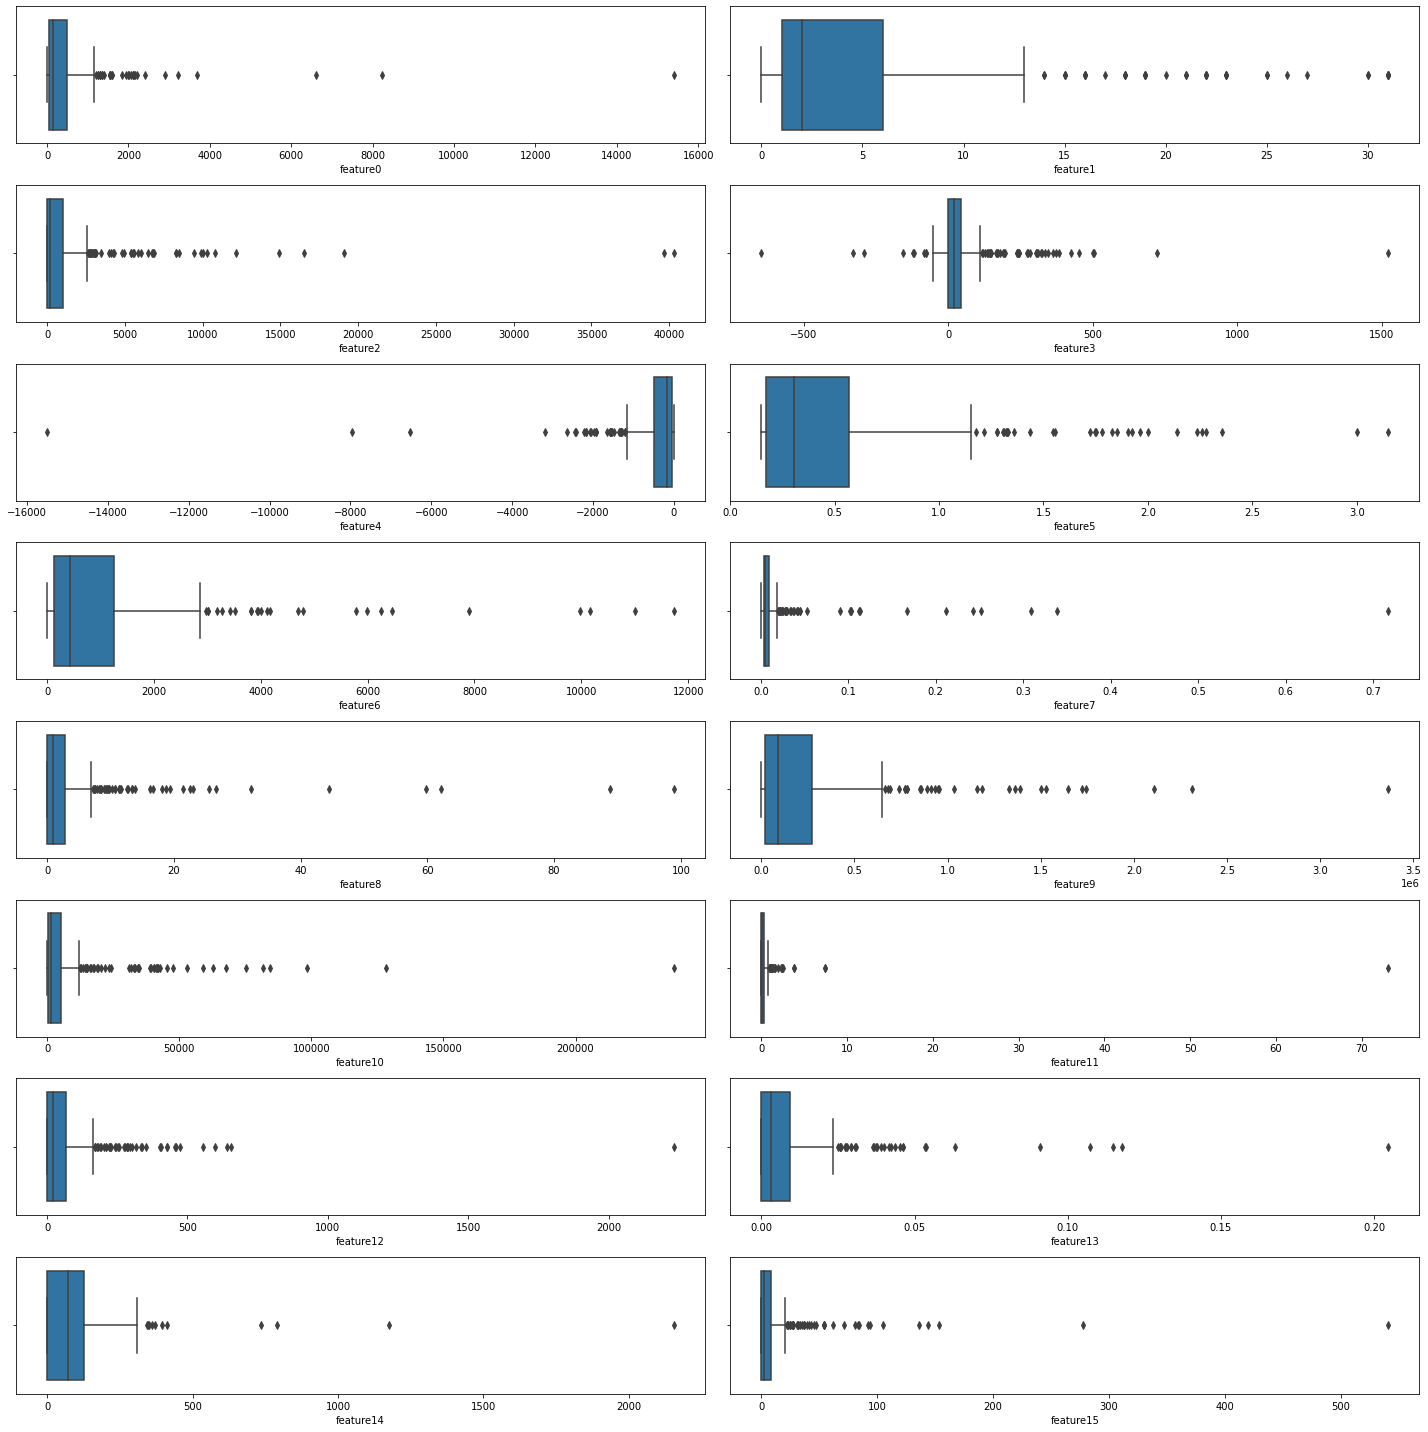

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
f = plt.figure(figsize=(20, 20))
gs = f.add_gridspec(8, 2)

i=0
for column in X_train: 
    ax = f.add_subplot(gs[i])
    sns.boxplot(x=X_train[column])
    i += 1
    
f.tight_layout()

## Lidando com valores ausentes

In [15]:
# count the number of nan values in each column
print(dataset.isnull().sum())

feature0     0
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
target       0
dtype: int64


O conjunto de dados não possui valores faltantes.

# Análise Exploratória dos Dados (AED)

## AED Automática 

In [16]:
#from pandas_profiling import ProfileReport

In [17]:
#dataset_no_index = dataset.reset_index(drop=True)
#profile = ProfileReport(dataset_no_index, title="Pandas Profiling Report")

In [18]:
#profile.to_file("report1.html")

## AED Manual

### Distribuição das características

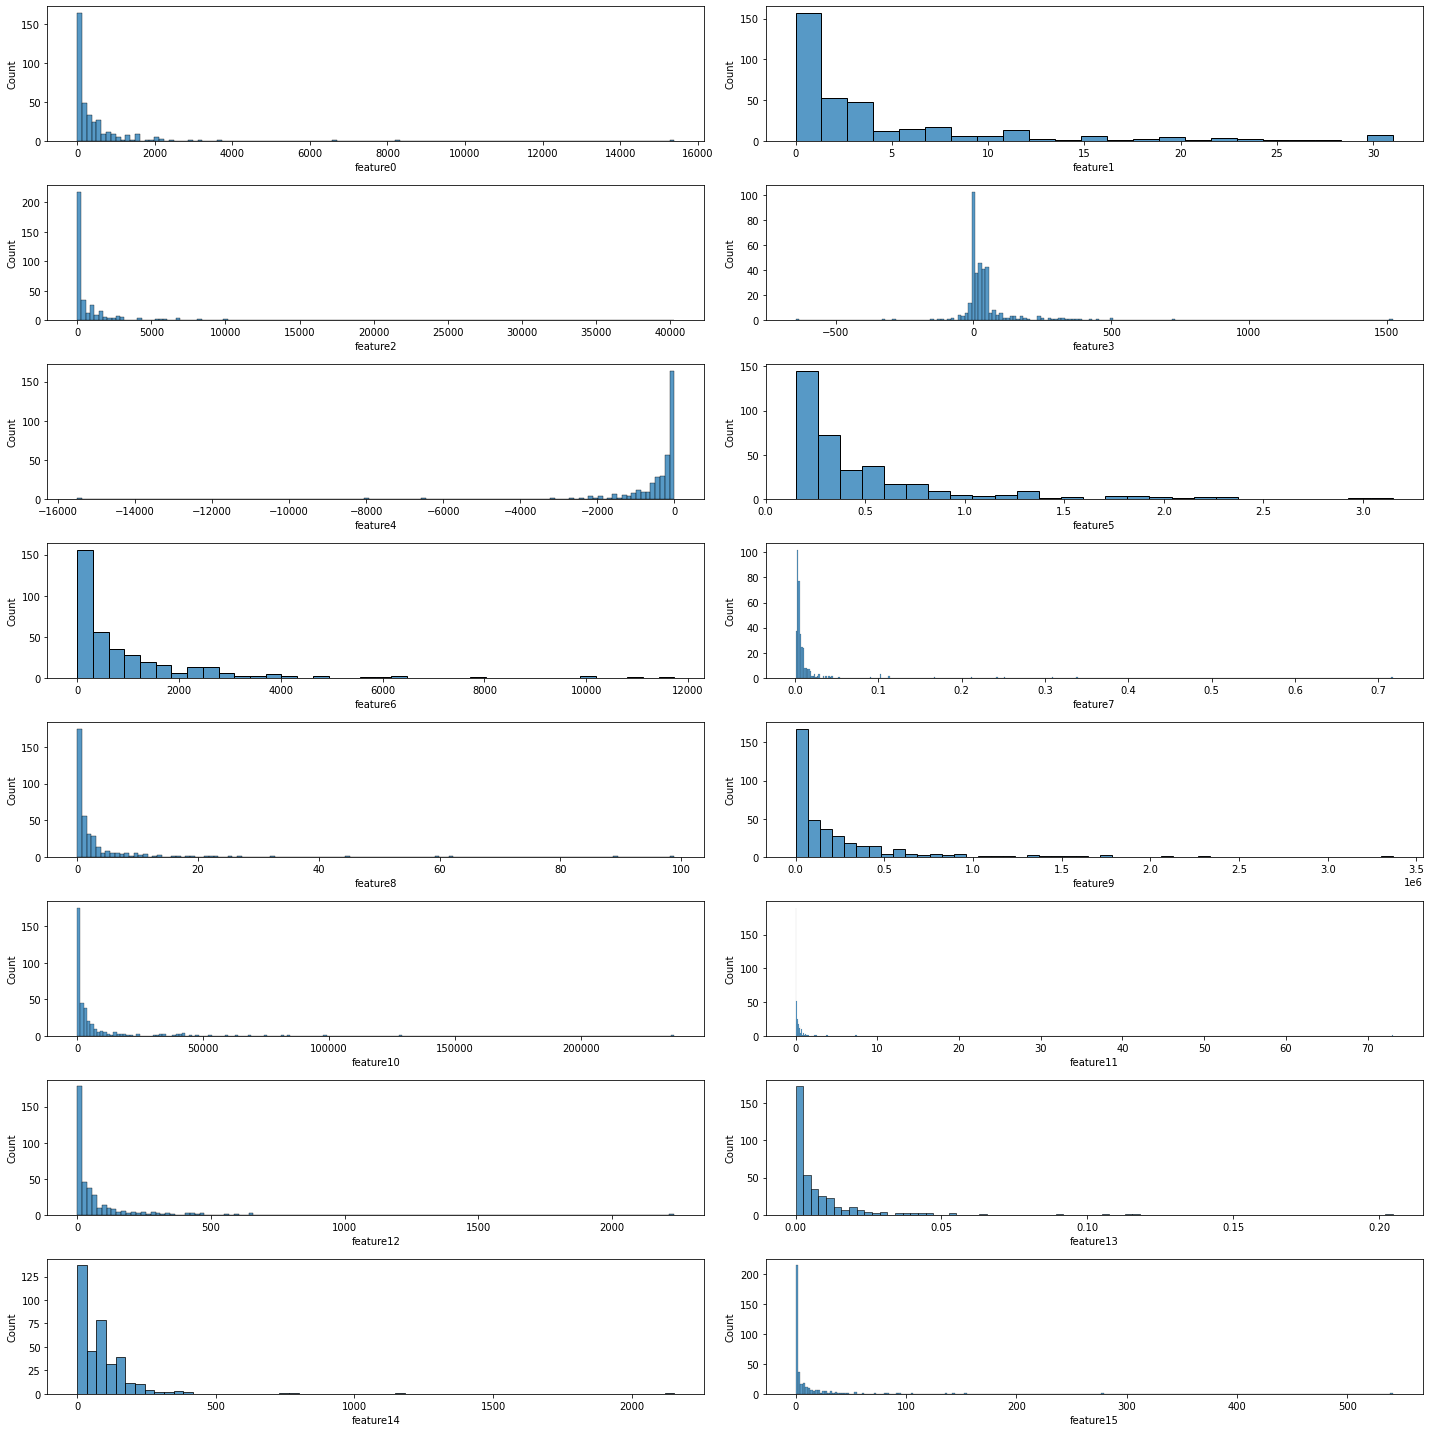

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
f = plt.figure(figsize=(20, 20))
gs = f.add_gridspec(8, 2)

i=0
for column in X_train: 
    ax = f.add_subplot(gs[i])
    sns.histplot(x=X_train[column])
    i += 1
    
f.tight_layout()

Com exceção da *feature3*, as *features* apresentam uma distribuição exponencial. Existe uma quantidade notável de algoritmos de *machine learning* que esperam entrads com distribuição gaussiana. Dito isso, na etapa de preparação de dados para treinamento uma transformação para deixar as distribuições mais gaussianas.

### Análise de correlação

Correlação de Pearson:
* 0.9 para mais ou para menos indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

#### Correlação entre as variáveis e o *target*

In [20]:
corr_matrix = training_set.corr()

In [21]:
corr_matrix['target'].sort_values(ascending=False)

target       1.000000
feature4     0.098820
feature11    0.054144
feature3    -0.048394
feature8    -0.054075
feature12   -0.070646
feature15   -0.077687
feature5    -0.098224
feature13   -0.105197
feature9    -0.107892
feature0    -0.111584
feature14   -0.120287
feature2    -0.123394
feature10   -0.123774
feature6    -0.137672
feature7    -0.151434
feature1    -0.196926
Name: target, dtype: float64

#### Correlação entre as variáveis

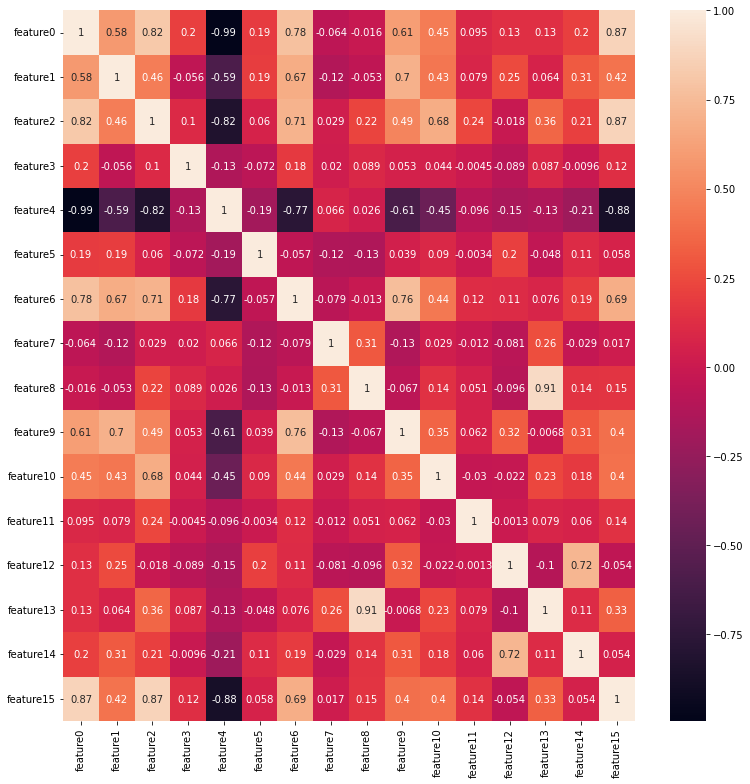

In [22]:
f = plt.figure(figsize=(11, 11))
sns.heatmap(X_train.corr(), annot=True);
f.tight_layout()

# Treinamento do modelo

## Preparação dos dados para o treinamento

### Deixando das distribuições mais gaussianas

In [23]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# f = plt.figure(figsize=(20, 20))
# gs = f.add_gridspec(8, 2)

# i=0
# for column in X_train_scaled: 
#     ax = f.add_subplot(gs[i])
#     sns.histplot(x=X_train_scaled[column])
#     i += 1
    
# f.tight_layout()

NameError: name 'X_train_scaled' is not defined

<Figure size 1440x1440 with 0 Axes>

### *IQR Robust Feature Scaling*

Muitos algortimos de *Machine Learning* performam melhor quando suas variáveis numéricas estão dentro de um intervalo de valores padrão. No presença de *outliers*  deve-se fazer uma normalização usando métricas relacionadas ao intervalo interquartil. 


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import pickle

# perform a robust scaler transform of the dataset
feature_scaler = RobustScaler()
X_train_scaled = pd.DataFrame(feature_scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

pickle.dump(feature_scaler, open('deploy/feature_scaler.pkl', 'wb'))

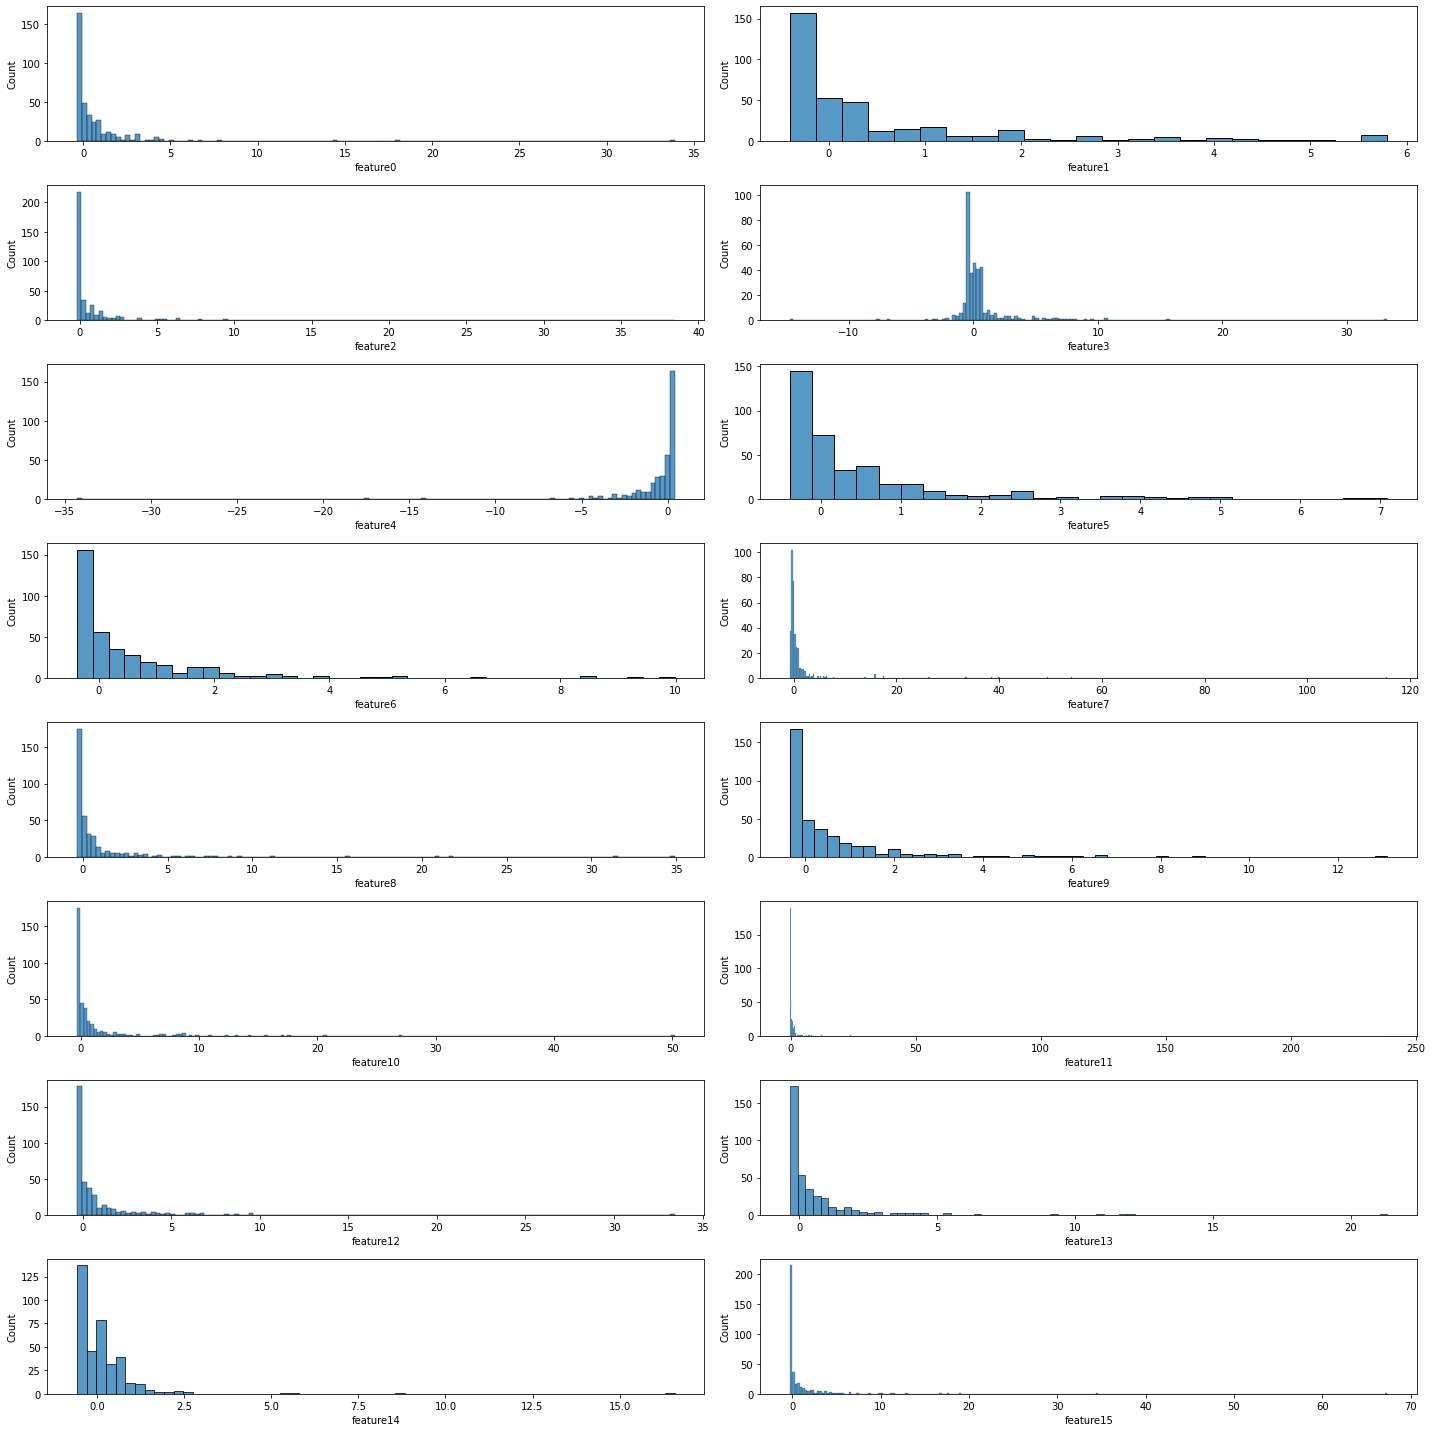

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
f = plt.figure(figsize=(20, 20))
gs = f.add_gridspec(8, 2)

i=0
for column in X_train_scaled: 
    ax = f.add_subplot(gs[i])
    sns.histplot(x=X_train_scaled[column])
    i += 1
    
f.tight_layout()

## Seleção do modelo

In [27]:
def display_scores(scores, algoritmo):
    print('Algoritmo ' + algoritmo)
    print("Scores:", scores)
    print("Mean: {:.4f}".format(scores.mean()))
    print("Standard deviation: {:.4f}".format(scores.std()))

### Naive Bayes

### Regressão Logística

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_lr = LogisticRegression(random_state=42).fit(X_train_scaled, y_train)
scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [29]:
display_scores(scores, 'Regressão Logística')

Algoritmo Regressão Logística
Scores: [0.62666667 0.61333333 0.68918919 0.66216216 0.58108108]
Mean: 0.6345
Standard deviation: 0.0377


### *K Nearest Neighbors* (KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier().fit(X_train_scaled, y_train)
scores = cross_val_score(model_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [34]:
display_scores(scores, 'K Nearest Neighbors (KNN)')

Algoritmo Regressão Logística
Scores: [0.57333333 0.61333333 0.67567568 0.67567568 0.60810811]
Mean: 0.6292
Standard deviation: 0.0403


### Árvore de decisão

In [37]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42).fit(X_train_scaled, y_train)
scores = cross_val_score(model_tree, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [38]:
display_scores(scores, 'Árvore de decisão')

Algoritmo Árvore de decisão
Scores: [0.57333333 0.53333333 0.60810811 0.54054054 0.5       ]
Mean: 0.5511
Standard deviation: 0.0368


### *Support Vector Machine* (SVM)

In [41]:
from sklearn.svm import SVC

model_svm = SVC(random_state=42, kernel='rbf').fit(X_train_scaled, y_train)
scores = cross_val_score(model_linear_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [42]:
display_scores(scores, 'SVM')

Algoritmo SVM
Scores: [0.56       0.58666667 0.7027027  0.60810811 0.62162162]
Mean: 0.6158
Standard deviation: 0.0482


## Aperfeiçoando o modelo (*Randomized Search*)

## Avaliação da performance do modelo

## Colocando o modelo em produção

### Salvando o modelo 

In [59]:
import pickle

pickle.dump(model_lr, open('/home/hagi/workspace/machine-learning-classifier/deploy/model.pkl', 'wb'))

In [62]:
sample = X_train.sample()
sample

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15
215,50.0,1,114.99,37.7,-12.3,0.15,82,0.112948,9.34878,726,4502.1,0.025541,12.3,0.012195,114.99,1


In [63]:
sample_json = sample.to_json(orient='records')

In [93]:
import requests
url = 'https://machine-learning-classifier.herokuapp.com/predict'
data = sample_json
header = {'Content-type':'application/json'}

# Request
r = requests.post(url=url, data=data, headers=header)

In [94]:
r.status_code

200

In [95]:
pd.DataFrame(r.json(), columns=r.json()[0].keys())

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,prediction
0,50.0,1,114.99,37.7,-12.3,0.15,82,0.112948,9.34878,726,4502.1,0.025541,12.3,0.012195,114.99,1,0


# Referências